![Elbit AI Academy](images/ai_acadamy.jpg)

# <center> Final Project </center>

### Project Description

* The project goal is to simulate a real-life ML in a production scenario 
* You will be required to show Data Engineering skills and use the current Best known method for ML production


### What will you need to show?

* Good usage of the tools for ml engineering 
* Ability to understand and monitor your model 
* Data engeneering skils


# <h1 style='background:#CCCCCC; border:0; color:black'><center><span style="color: royalblue;"><span style="color: royalblue;">Intro</span></span></center></h1> 
Welcome to the [facial expression competition](https://www.kaggle.com/c/challenges-in-representation-learning-facial-expression-recognition-challenge).



<table>
    <tr>
        <td><img src="https://i.ibb.co/B394D0t/12.png" width="100%" height="100%"></td>
        <td><img src="https://i.ibb.co/5xV8MZj/40.png" width="100%" height="100%"></td>
        <td><img src="https://i.ibb.co/bFgXc43/19.png" width="100%" height="100%"></td>
    </tr>
</table>
The data consists of 48x48 pixel grayscale images of faces. The faces have been automatically registered so that the face is more or less centered and occupies about the same amount of space in each image. The task is to categorize each face based on the emotion shown in the facial expression in to one of seven categories:

| categorie  | emotion  |
|:---:|:---|
| 0  | Angry  |
| 1  |  Disgust |
| 2  |  Fear |
| 3  |  Happy |
| 4  |  Sad |
| 5  |  Surprise |
| 6  | Neutral |

We define a simple CNN model and compare the predicted results with ge given labels.


# <h1 style='background:#CCCCCC; border:0; color:black'><center><span style="color: royalblue;">Libraries</span></center></h1> 
We load some standard libraries and packages of sklearn and keras.

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

from tensorflow.keras import models
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import RMSprop,Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D,BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D

import mlflow

In [2]:
# check the current directory
base_directory = %pwd
base_directory

'C:\\working\\gitos\\keras-onnx'

In [3]:
models_path         = 'models/'
data_v1_path        = 'data_v1/'
data_v2_path        = 'data_v2/'
dvc_repository_path = 'dvc_repository'
raw_data_path       = 'raw_data/'
mlflow_path         = 'mlflow/'

# <h1 style='background:#CCCCCC; border:0; color:black'><center><span style="color: royalblue;"><span style="color: royalblue;">Configuration</span></span></center></h1> 
Get the configuration for a given month

### Load the configuration for a given month

In [4]:
conf = pd.read_csv(raw_data_path + 'config.csv')
conf

,Model,Train,Module,Accuracy-1,Accuracy-2
0,1,initial_training_data.csv,facial_expression_0,0.249373,0.249373
1,1,data_gathered_at_0.csv,facial_expression_1,0.249373,0.249930
2,1,data_gathered_at_1.csv,facial_expression_2,0.169128,0.169685
3,1,data_gathered_at_2.csv,facial_expression_3,0.249373,0.249373
4,1,data_gathered_at_2_bk.csv,facial_expression_4,0.249373,0.248816
5,1,data_gathered_at_3.csv,facial_expression_5,0.249652,0.249930
6,2,data_gathered_at_4.csv,facial_expression_6,0.185288,0.182781
7,2,data_gathered_at_5.csv,facial_expression_7,0.249373,0.194205
8,2,data_gathered_at_6.csv,facial_expression_8,0.250766,0.250766


# <h1 style='background:#CCCCCC; border:0; color:black'><center><span style="color: royalblue;"><span style="color: royalblue;">Load Train Data</span></span></center></h1> 
Load the image data with labels.

In [5]:
train = pd.read_csv(raw_data_path + 'initial_training_data.csv')

In [6]:
train.drop(columns=['rand'], inplace=True)

In [7]:
train.head()

,Emotion,Pixels
0,0,215 218 222 220 221 226 218 215 216 218 218 21...
1,6,145 146 118 26 15 18 16 18 24 38 57 66 71 78 8...
2,4,2 3 4 9 9 10 9 10 12 17 20 21 22 22 19 17 15 1...
3,3,38 42 35 25 51 33 32 20 29 47 40 28 42 56 61 7...
4,2,32 26 37 68 99 112 117 121 123 126 129 135 141...


# <h1 style='background:#CCCCCC; border:0; color:black'><center><span style="color: royalblue;"><span style="color: royalblue;">Load Validation Data</span></span></center></h1> 
Load the image data with labels.

In [8]:
val = pd.read_csv(raw_data_path + 'validation_test_data.csv')

In [9]:
val.head()

,Emotion,Pixels
0,0,170 118 101 88 88 75 78 82 66 74 68 59 63 64 6...
1,5,7 5 8 6 7 3 2 6 5 4 4 5 7 5 5 5 6 7 7 7 10 10 ...
2,6,232 240 241 239 237 235 246 117 24 24 22 13 12...
3,4,200 197 149 139 156 89 111 58 62 95 113 117 11...
4,2,40 28 33 56 45 33 31 78 152 194 200 186 196 20...


# <h1 style='background:#CCCCCC; border:0; color:black'><center><span style="color: royalblue;"><span style="color: royalblue;">Load Test Data</span></span></center></h1> 
Load the image data with labels.

In [10]:
test = pd.read_csv(raw_data_path + 'test_data.csv')

In [11]:
test.head()

,Emotion,Pixels
0,0,254 254 254 254 254 249 255 160 2 58 53 70 77 ...
1,1,156 184 198 202 204 207 210 212 213 214 215 21...
2,4,69 118 61 60 96 121 103 87 103 88 70 90 115 12...
3,6,205 203 236 157 83 158 120 116 94 86 155 180 2...
4,3,87 79 74 66 74 96 77 80 80 84 83 89 102 91 84 ...


# <h1 style='background:#CCCCCC; border:0; color:black'><center><span style="color: royalblue;"><span style="color: royalblue;">Functions</span></span></center></h1> 
We define some helper functions for preparing and ploting the data.

In [12]:
def prepare_data(data):
    """ Prepare data for modeling 
        input: data frame with labels und pixel data
        output: image and label array """
    
    image_array = np.zeros(shape=(len(data), 48, 48))
    image_label = np.array(list(map(int, data['Emotion'])))
    
    for i, row in enumerate(data.index):
        image = np.fromstring(data.loc[row, 'Pixels'], dtype=int, sep=' ')
        image = np.reshape(image, (48, 48))
        image_array[i] = image
        
    return image_array, image_label

def data_to_tf_data(df):
    image_array, image_label = prepare_data(df)
    images = image_array.reshape((image_array.shape[0], 48, 48, 1))
    images = images.astype('float32')/255
    labels = to_categorical(image_label)
    return images, labels

def plot_examples(label=0):
    fig, axs = plt.subplots(1, 2, figsize=(6, 6))
    fig.subplots_adjust(hspace = .2, wspace=.2)
    axs = axs.ravel()
    for i in range(2):
        idx = train[train['Emotion']==label].index[i]
        axs[i].imshow(train_images[idx][:,:,0], cmap='gray')
        axs[i].set_title(emotions[train_labels[idx].argmax()])
        axs[i].set_xticklabels([])
        axs[i].set_yticklabels([])
        
def plot_all_emotions():
    fig, axs = plt.subplots(1, 7, figsize=(30, 12))
    fig.subplots_adjust(hspace = .2, wspace=.2)
    axs = axs.ravel()
    for i in range(7):
        idx = train[train['Emotion']==i].index[i]
        axs[i].imshow(train_images[idx][:,:,0], cmap='gray')
        axs[i].set_title(emotions[train_labels[idx].argmax()])
        axs[i].set_xticklabels([])
        axs[i].set_yticklabels([])
        
def plot_image_and_emotion(test_image_array, test_image_label, pred_test_labels, image_number):
    """ Function to plot the image and compare the prediction results with the label """
    
    fig, axs = plt.subplots(1, 2, figsize=(12, 6), sharey=False)
    
    bar_label = emotions.values()
    
    axs[0].imshow(test_image_array[image_number], 'gray')
    axs[0].set_title(emotions[test_image_label[image_number]])
    
    axs[1].bar(bar_label, pred_test_labels[image_number], color='orange', alpha=0.7)
    axs[1].grid()
    
    plt.show()
    
def plot_compare_distributions(array1, array2, title1='', title2=''):
    df_array1 = pd.DataFrame()
    df_array2 = pd.DataFrame()
    df_array1['Emotion'] = array1.argmax(axis=1)
    df_array2['Emotion'] = array2.argmax(axis=1)
    
    fig, axs = plt.subplots(1, 2, figsize=(12, 6), sharey=False)
    x = emotions.values()
    
    y = df_array1['Emotion'].value_counts()
    keys_missed = list(set(emotions.keys()).difference(set(y.keys())))
    for key_missed in keys_missed:
        y[key_missed] = 0
    axs[0].bar(x, y.sort_index(), color='orange')
    axs[0].set_title(title1)
    axs[0].grid()
    
    y = df_array2['Emotion'].value_counts()
    keys_missed = list(set(emotions.keys()).difference(set(y.keys())))
    for key_missed in keys_missed:
        y[key_missed] = 0
    axs[1].bar(x, y.sort_index())
    axs[1].set_title(title2)
    axs[1].grid()
    
    plt.show()

# <h1 style='background:#CCCCCC; border:0; color:black'><center><span style="color: royalblue;"><span style="color: royalblue;">Prepare Data</span></span></center></h1> 

In [13]:
emotions = {0: 'Angry', 1: 'Disgust', 2: 'Fear', 3: 'Happy', 4: 'Sad', 5: 'Surprise', 6: 'Neutral'}

Define training, validation and test data:

In [14]:
train_image_array, train_image_label = prepare_data(train)
val_image_array,   val_image_label   = prepare_data(val)
test_image_array,  test_image_label  = prepare_data(test)

Reshape and scale the images:

In [15]:
train_images = train_image_array.reshape((train_image_array.shape[0], 48, 48, 1))
train_images = train_images.astype('float32')/255
val_images   = val_image_array.reshape((val_image_array.shape[0], 48, 48, 1))
val_images   = val_images.astype('float32')/255
test_images  = test_image_array.reshape((test_image_array.shape[0], 48, 48, 1))
test_images  = test_images.astype('float32')/255

Encoding of the target value:

In [16]:
train_labels = to_categorical(train_image_label)
val_labels   = to_categorical(val_image_label)
test_labels  = to_categorical(test_image_label)

# <h1 style='background:#CCCCCC; border:0; color:black'><center><span style="color: royalblue;"><span style="color: royalblue;">Some Examples</span></span></center></h1> 

## All Emotions

In [17]:
#plot_all_emotions()

## Angry

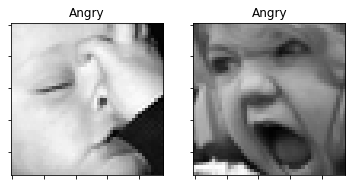

In [18]:
plot_examples(label=0)

## Disgust

In [19]:
#plot_examples(label=1)

## Fear

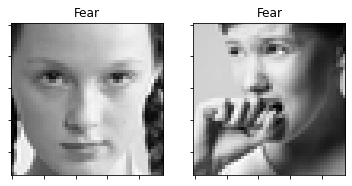

In [20]:
plot_examples(label=2)

## Happy

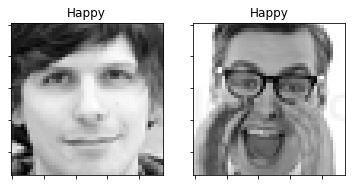

In [21]:
plot_examples(label=3)


## Sad

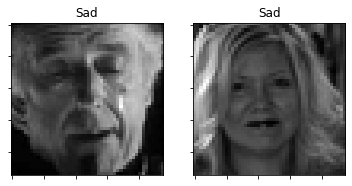

In [22]:
plot_examples(label=4)

## Surprise

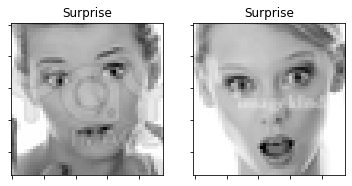

In [23]:
plot_examples(label=5)

## Neutral

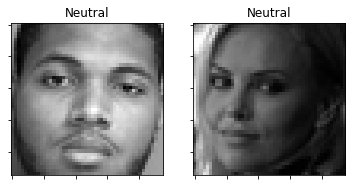

In [24]:
plot_examples(label=6)

# <h1 style='background:#CCCCCC; border:0; color:black'><center><span style="color: royalblue;"><span style="color: royalblue;">Distribution Of Labels</span></span></center></h1> 

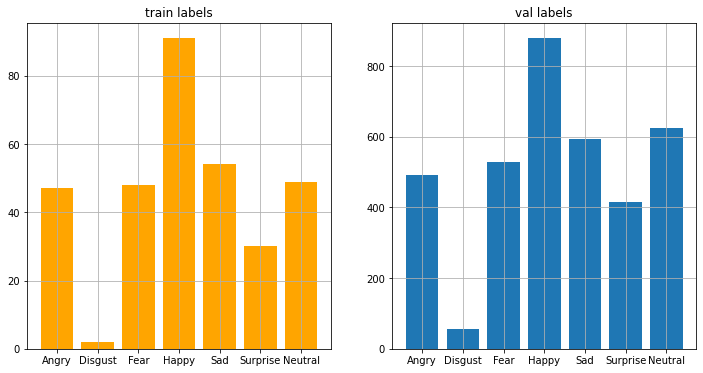

In [25]:
plot_compare_distributions(train_labels, val_labels, title1='train labels', title2='val labels')

# <h1 style='background:#CCCCCC; border:0; color:black'><center><span style="color: royalblue;"><span style="color: royalblue;">Class Weights</span></span></center></h1> 
Calculate the class weights of the label distribution:

In [26]:
class_weight = dict(zip(range(0, 7), (((train['Emotion'].value_counts()).sort_index())/len(train['Emotion'])).tolist()))

In [27]:
class_weight

{0: 0.14641744548286603,
 1: 0.006230529595015576,
 2: 0.14953271028037382,
 3: 0.2834890965732087,
 4: 0.16822429906542055,
 5: 0.09345794392523364,
 6: 0.1526479750778816}

# <h1 style='background:#CCCCCC; border:0; color:black'><center><span style="color: royalblue;"><span style="color: royalblue;">Load Model #1</span></span></center></h1> 
We define a simple CNN model:

In [28]:
import tensorflow as tf

print(tf.__version__)
print(tf.keras.__version__)

2.3.1
2.4.0


In [29]:
model_1 = tf.keras.models.load_model('models/model_v1.h5')

In [30]:
test_loss, test_acc = model_1.evaluate(test_images, test_labels)
print('test caccuracy:', test_acc)

113/113 [==============================] - 2s 18ms/step - loss: 1.8454 - accuracy: 0.2508
test caccuracy: 0.25076621770858765


In [31]:
pred_test_labels = model_1.predict(test_images)
print(pred_test_labels)


[[0.07422265 0.00314834 0.10829963 ... 0.27058268 0.0341511  0.14049534]
 [0.14067097 0.008576   0.11206872 ... 0.17988195 0.04826011 0.12604602]
 [0.1471021  0.01676576 0.11795928 ... 0.19208959 0.06763785 0.15166989]
 ...
 [0.1385003  0.00822688 0.11642748 ... 0.1907211  0.04966829 0.13829012]
 [0.12792209 0.01398641 0.11048409 ... 0.21092013 0.06483358 0.16233435]
 [0.1288412  0.01724123 0.13806766 ... 0.21363    0.0680379  0.14689042]]


# <h1 style='background:#CCCCCC; border:0; color:black'><center><span style="color: royalblue;"><span style="color: royalblue;">Load Model #2</span></span></center></h1> 
We define a simple CNN model:

In [32]:
import tensorflow as tf

print(tf.__version__)
print(tf.keras.__version__)

2.3.1
2.4.0


In [33]:
model_2 = tf.keras.models.load_model('models/model_v2.h5')

In [34]:
test_loss, test_acc = model_2.evaluate(test_images, test_labels)
print('test caccuracy:', test_acc)

113/113 [==============================] - 127s 1s/step - loss: 2.6240 - accuracy: 0.2494
test caccuracy: 0.24937307834625244


In [35]:
pred_test_labels = model_2.predict(test_images)
print(pred_test_labels)


[[0.03283699 0.00295905 0.02017734 ... 0.04847366 0.00521857 0.20320208]
 [0.02839349 0.00296436 0.03348335 ... 0.05663727 0.00448208 0.21942215]
 [0.0248827  0.00280969 0.02290023 ... 0.04577991 0.00439127 0.18718141]
 ...
 [0.02500761 0.00278125 0.02898238 ... 0.07804645 0.00573064 0.2894429 ]
 [0.02952756 0.00311853 0.02545153 ... 0.04640645 0.00483896 0.23276412]
 [0.02971195 0.00320389 0.02267978 ... 0.04136266 0.00382462 0.21136251]]


# <h1 style='background:#CCCCCC; border:0; color:black'><center><span style="color: royalblue;"><span style="color: royalblue;">Analyse Results</span></span></center></h1> 

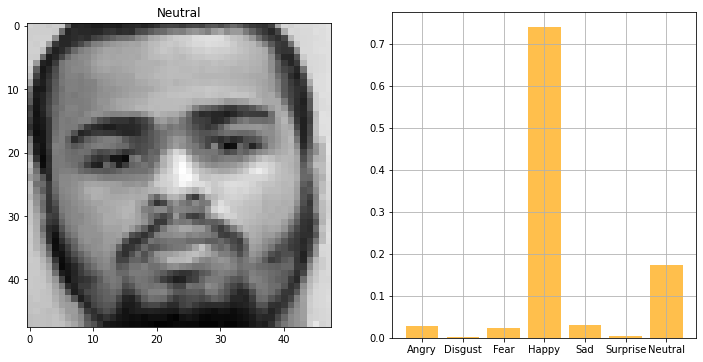

In [36]:
plot_image_and_emotion(test_image_array, test_image_label, pred_test_labels, 106)

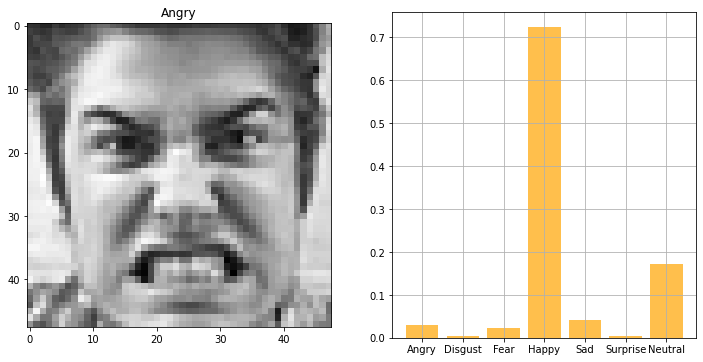

In [37]:
plot_image_and_emotion(test_image_array, test_image_label, pred_test_labels, 40)

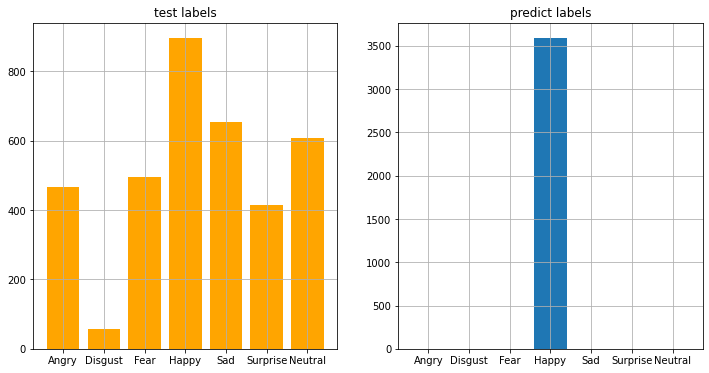

In [38]:
plot_compare_distributions(test_labels, pred_test_labels, title1='test labels', title2='predict labels')

# <h1 style='background:#CCCCCC; border:0; color:black'><center><span style="color: royalblue;"><span style="color: royalblue;">Analyse Wrong Prediction</span></span></center></h1> 
The accuracy score is about 54% on the test set. So it is obvious to take focus on the wrong predictions. We want to extract details to improve the model.

In [39]:
df_compare = pd.DataFrame()
df_compare['real'] = test_labels.argmax(axis=1)
df_compare['pred'] = pred_test_labels.argmax(axis=1)
df_compare['wrong'] = np.where(df_compare['real']!=df_compare['pred'], 1, 0)

In [40]:
conf_mat = confusion_matrix(test_labels.argmax(axis=1), pred_test_labels.argmax(axis=1))
conf_mat

array([[  0,   0,   0, 467,   0,   0,   0],
       [  0,   0,   0,  56,   0,   0,   0],
       [  0,   0,   0, 496,   0,   0,   0],
       [  0,   0,   0, 895,   0,   0,   0],
       [  0,   0,   0, 653,   0,   0,   0],
       [  0,   0,   0, 415,   0,   0,   0],
       [  0,   0,   0, 607,   0,   0,   0]], dtype=int64)

<ipython-input-41-45440dedc879>:6: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


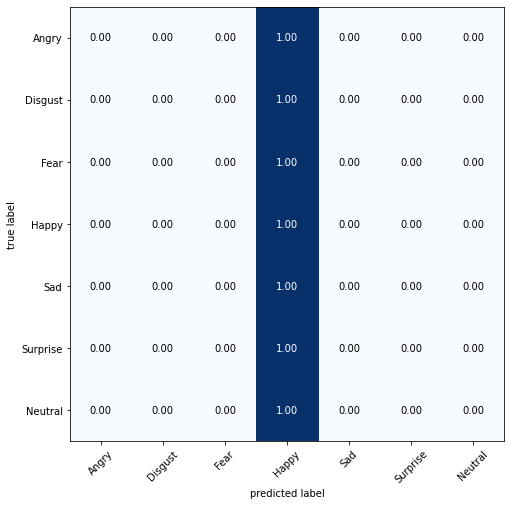

In [41]:
fig, ax = plot_confusion_matrix(conf_mat=conf_mat,
                                show_normed=True,
                                show_absolute=False,
                                class_names=emotions.values(),
                                figsize=(8, 8))
fig.show()

In [42]:
!jupyter nbconvert --to html load.ipynb --template basic

[NbConvertApp] Converting notebook load.ipynb to html
[NbConvertApp] Writing 180902 bytes to load.html


In [43]:
import datetime
now = datetime.datetime.now()
print(f"{now.strftime('%d-%m-%Y %H:%M:%S')}: Finished Successfully")

01-06-2021 06:39:47: Finished Successfully
